# Reference: Model Code

This page is a reference for the code used to generate the figures in the previous results page.

This is included largely for reproducibility so that others can generate similar results; it also provides more fine-grained insight into the model implementation.

## Initialization

In [1]:
# Run dependencies
%run ./model_python_lib_utils.ipynb
%run ./model_python_lib_event_counts.ipynb
%run ./model_python_lib_decision_functions.ipynb
%run ./python_lib_visualization.ipynb
%run ./model_wrapper.ipynb

<ipython-input-1-a2bbd7e510ee>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent['filler_1'] = points_lookup(agent_move, transition_move_lookup("transition_up", df_agent[move])).tolist()
<ipython-input-1-a2bbd7e510ee>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent['filler_2'] = points_lookup(agent_move, transition_move_lookup("transition_down", df_agent[move])).tolist()
<ipython-input-1-a2bbd7e510ee>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

## Model Benchmark: Human Performance

In [ ]:
# Read data
df = read_rps_data(os.path.join("data", DEFAULT_FILE))
df.head()

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

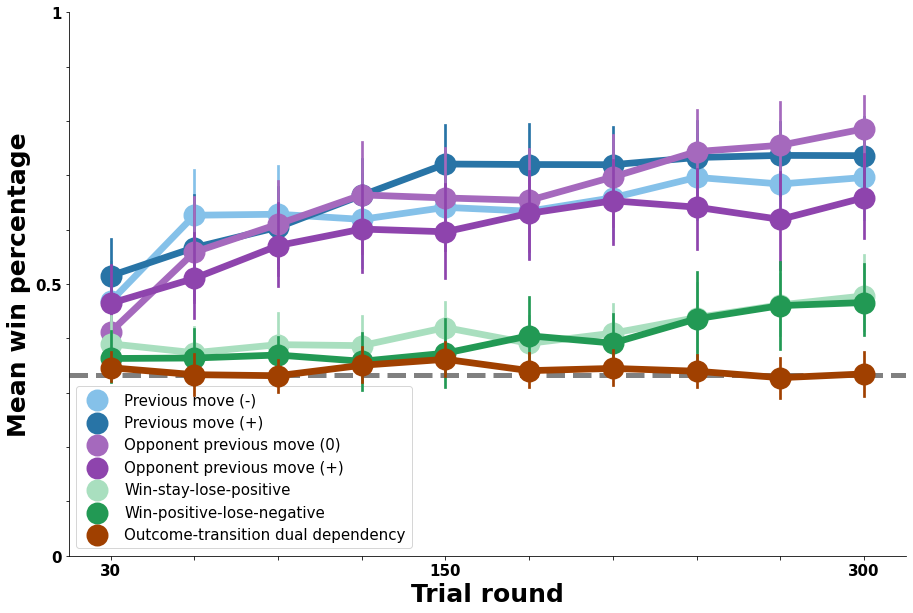

In [8]:
# Plot human win rates
f_a = groupby_f_data(df_agent, 'player_outcome', bins=10)
plot_win_rates(f_a[f_a['player_outcome']=='win']) # NB: add a filename argument to save the figure locally

## *Null Model*: Tracking Opponent Move Baserates

*Run model*

In [4]:
model1 = df_agent.copy()
model1['ev_rock'] = model1['ev_move_baserate_rock']
model1['ev_paper'] = model1['ev_move_baserate_paper']
model1['ev_scissors'] = model1['ev_move_baserate_scissors']

# Compute softmax distribution
m1_softmax = get_softmax_probabilities(
    model1,
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above
model1 = pick_move(model1, m1_softmax)

# Evaluate outcome of agent move choices in simulation above
model1 = assign_agent_outcomes(model1)

*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

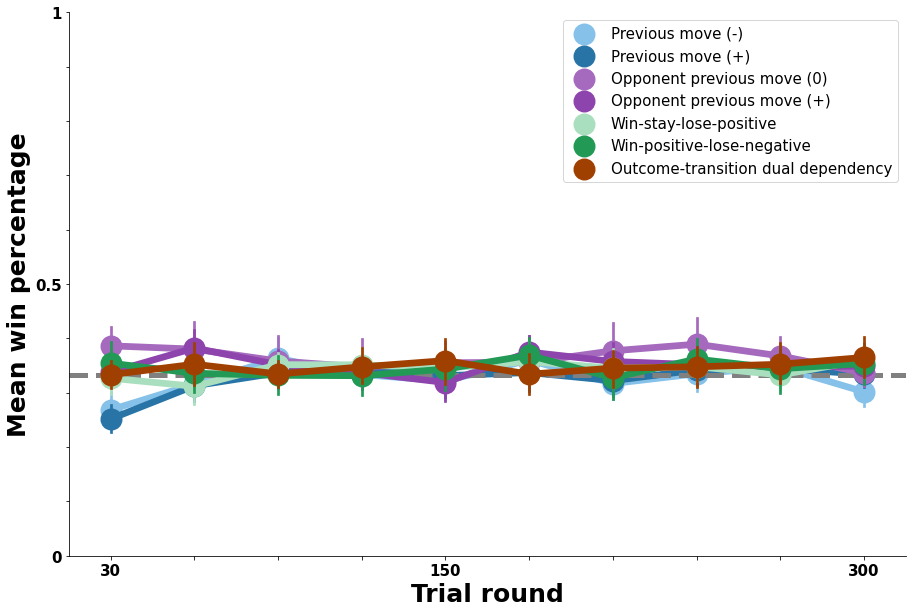

In [10]:
# Plot agent win rates
f_b = groupby_f_data(model1, 'agent_outcome', bins=10)
plot_win_rates(f_b[f_b['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## *Transition Model*: Tracking Opponent Self-Transitions

*Run model*

In [11]:
model2 = df_agent.copy()
model2['ev_rock'] = model2['ev_move_baserate_rock'] + model2['ev_transition_rock']
model2['ev_paper'] = model2['ev_move_baserate_paper'] + model2['ev_transition_paper']
model2['ev_scissors'] = model2['ev_move_baserate_scissors'] + model2['ev_transition_scissors']

# Compute softmax distribution
m2_softmax = get_softmax_probabilities(
    model2,
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above
model2 = pick_move(model2, m2_softmax)

# Evaluate outcome of agent move choices in simulation above
model2 = assign_agent_outcomes(model2)

72.75148606300354


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

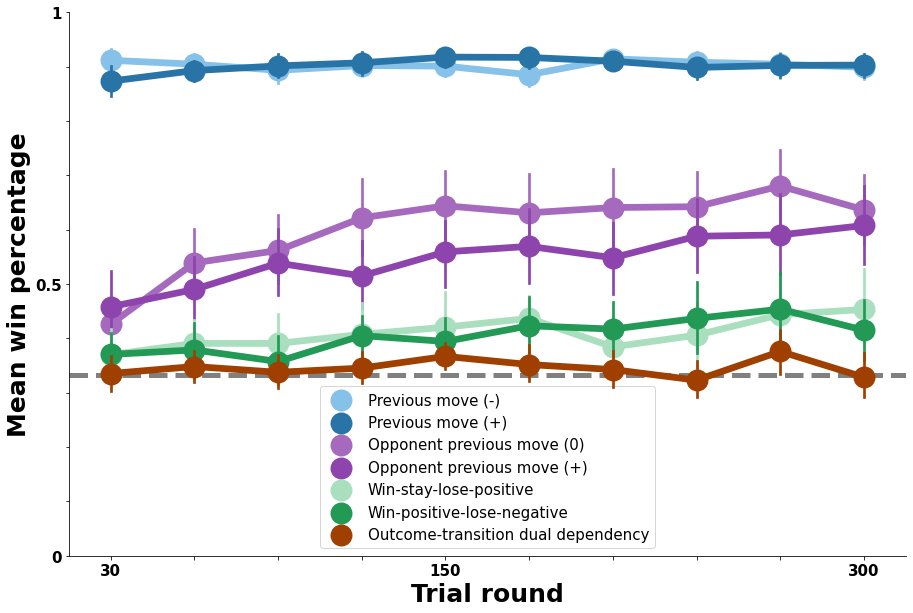

In [14]:
# Plot agent win rates
f_c = groupby_f_data(model2, 'agent_outcome', bins = 10)
plot_win_rates(f_c[f_c['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## *Transition Model*: Tracking Opponent Opponent-Transitions

*Run model*

In [15]:
model3 = df_agent.copy()
model3['ev_rock'] = model3['ev_move_baserate_rock'] + model3['ev_cournot_transition_rock']
model3['ev_paper'] = model3['ev_move_baserate_paper'] + model3['ev_cournot_transition_paper']
model3['ev_scissors'] = model3['ev_move_baserate_scissors'] + model3['ev_cournot_transition_scissors']

# Compute softmax distribution
m3_softmax = get_softmax_probabilities(
    model3, 
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above
model3 = pick_move(model3, m3_softmax)

# Evaluate outcome of agent move choices in simulation above
model3 = assign_agent_outcomes(model3)

72.12722420692444


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

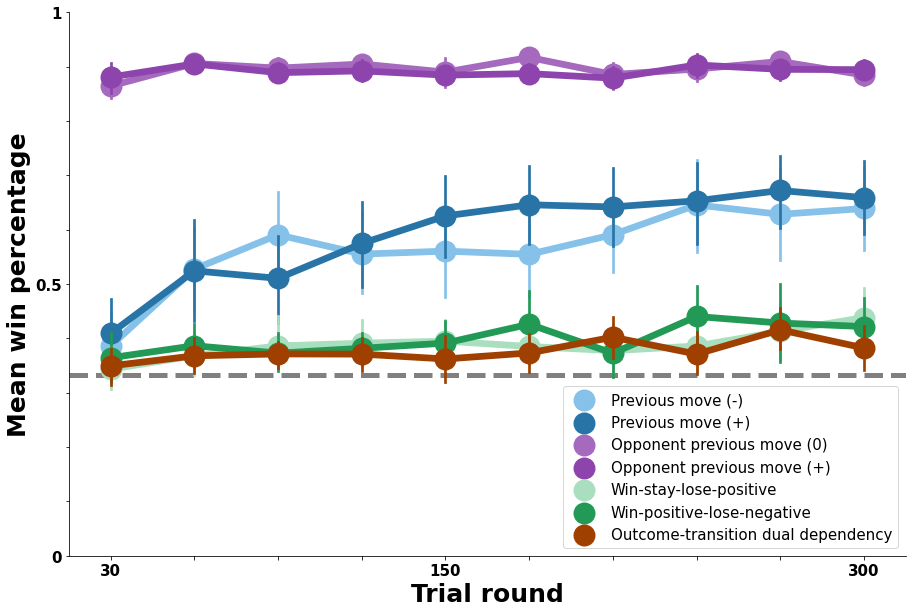

In [18]:
# Plot agent win rates
f_d = groupby_f_data(model3, 'agent_outcome', bins=10)
plot_win_rates(f_d[f_d['agent_outcome']=='win'], img_name= 'model_botcournot_transition_only.png') # NB: add a filename argument to save the figure locally

## *Combined Transition Model*: Tracking Opponent Self- *and* Opponent-Transitions

*Run model*

In [19]:
model4 = df_agent.copy()
model4['ev_rock'] = model4['ev_move_baserate_rock'] + model4['ev_transition_rock'] + model4['ev_cournot_transition_rock']
model4['ev_paper'] = model4['ev_move_baserate_paper'] + model4['ev_transition_paper'] + model4['ev_cournot_transition_paper']
model4['ev_scissors'] = model4['ev_move_baserate_scissors'] + model4['ev_transition_scissors']+ model4['ev_cournot_transition_scissors']

# Compute softmax distribution
m4_softmax = get_softmax_probabilities(
    model4,
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above
model4 = pick_move(model4, m4_softmax)

# Evaluate outcome of agent move choices in simulation above
model4 = assign_agent_outcomes(model4)

71.46850514411926


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

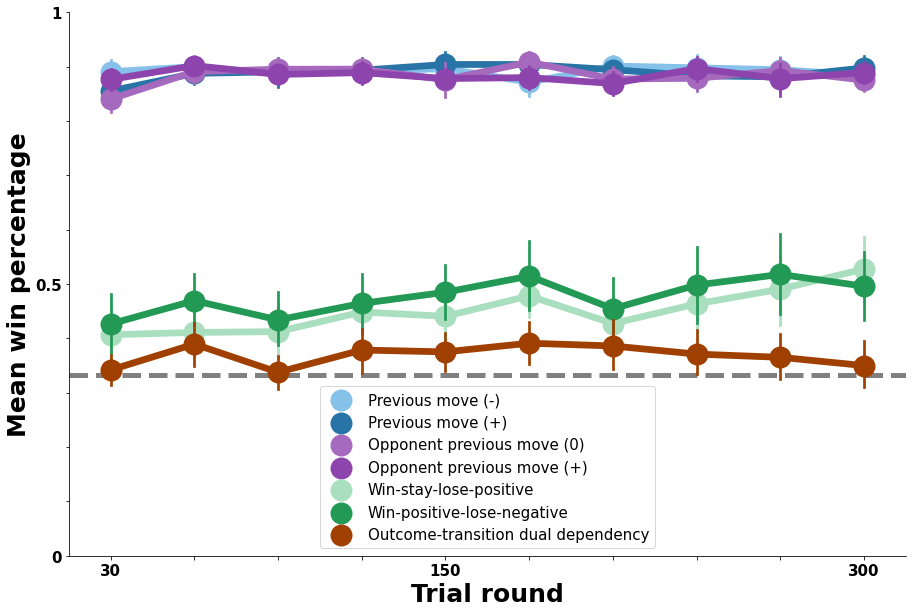

In [22]:
# Plot agent win rates
f_e = groupby_f_data(model4, 'agent_outcome', bins = 10)
plot_win_rates(f_e[f_e['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## *Outcome-Transition Model*: Tracking Opponent Transitions Across Outcomes

*Run model*

In [23]:
model5 = df_agent.copy()
model5['ev_rock'] = model5['ev_outcome_transition_rock']
model5['ev_paper'] = model5['ev_outcome_transition_paper']
model5['ev_scissors'] = model5['ev_outcome_transition_scissors']

# Compute softmax distribution
m5_softmax = get_softmax_probabilities(
    model5,
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above
model5 = pick_move(model5, m5_softmax)

# Evaluate outcome of agent move choices in simulation above
model5 = assign_agent_outcomes(model5)

71.46870303153992


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

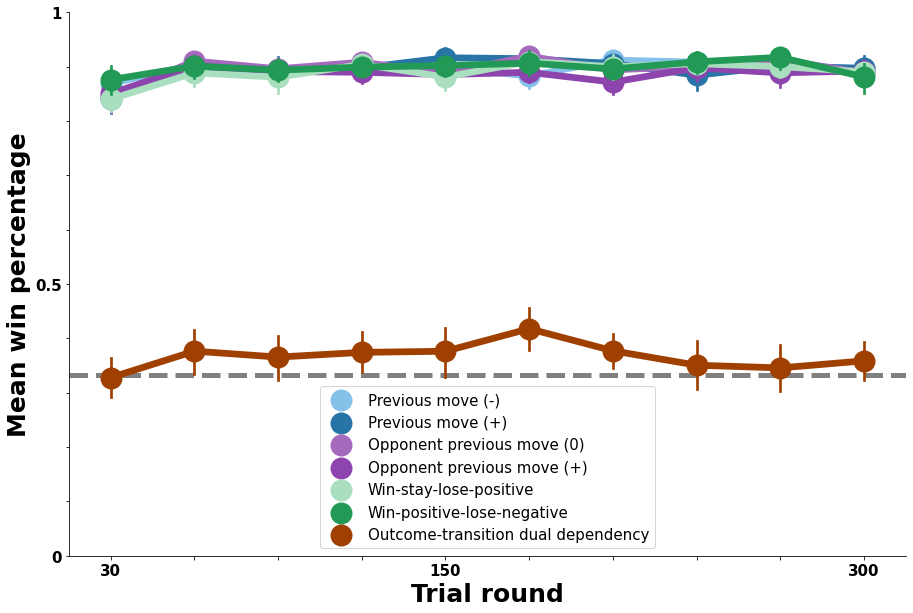

In [31]:
# Plot agent win rates
f_f = groupby_f_data(model5, 'agent_outcome', bins=10)
plot_win_rates(f_f[f_f['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## *Dual-Outcome-Transition Model*: Tracking Opponent Transitions Across Outcomes *and* Prior Transitions

*Run model*

In [34]:
model6 = df_agent.copy()
model6['ev_rock'] = model6['ev_outcome_dual_depend_rock']
model6['ev_paper'] = model6['ev_outcome_dual_depend_paper']
model6['ev_scissors'] = model6['ev_outcome_dual_depend_scissors']

# Compute softmax distribution
m6_softmax = get_softmax_probabilities(
    model6,
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above
model6 = pick_move(model6, m6_softmax)

# Evaluate outcome of agent move choices in simulation above
model6 = assign_agent_outcomes(model6)

73.76682901382446


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

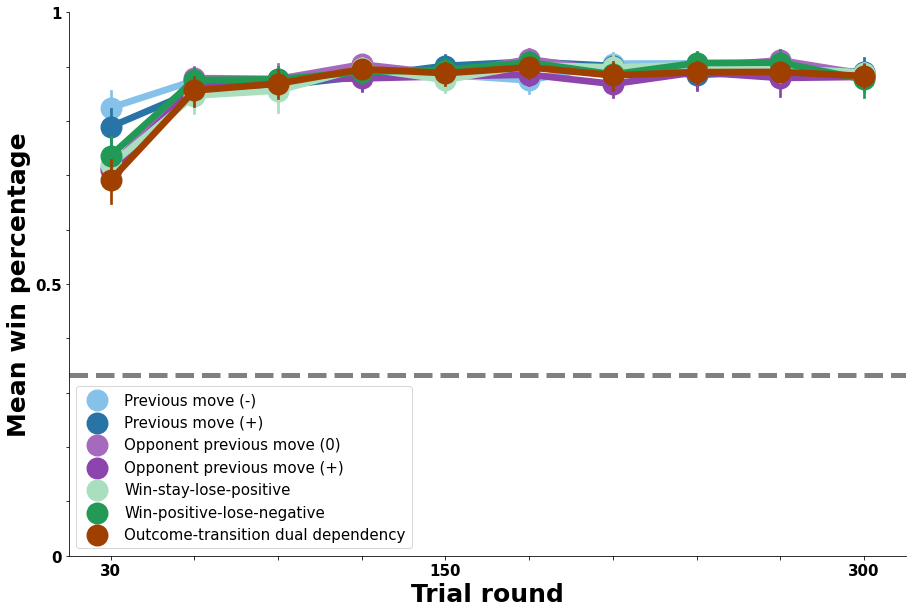

In [37]:
# Plot agent win rates
f_g = groupby_f_data(model6, 'agent_outcome', bins=10)
plot_win_rates(f_g[f_g['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally